#  <span style="color:BLUE">IMPORTACIÓN DE LIBRERIAS</span>

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras import models, layers
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from timeit import timeit
from time import time
import numpy as np
import matplotlib.pyplot as plt

#  <span style="color:BLUE">**CARGA DEL DATASET (50000K DE IMÁGENES) Y SU RESPECTIVA NORMALIZACIÓN**</span>

In [1]:
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

x_train =normalize(x_train) 
x_test =normalize(x_test)

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)


Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


#  <span style="color:BLUE">CREACIÓN Y ENTRENAMIENTO DEL MODELO</span>

In [2]:

#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,3), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

start_time = time()
hist = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 250us/step - loss: 2.0326 - accuracy: 0.2683 - val_loss: 1.8911 - val_accuracy: 0.3308
Epoch 2/10
50000/50000 [==============================] - 6s 128us/step - loss: 1.8263 - accuracy: 0.3544 - val_loss: 1.8309 - val_accuracy: 0.3543
Epoch 3/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.7413 - accuracy: 0.3886 - val_loss: 1.7440 - val_accuracy: 0.3834
Epoch 4/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.6828 - accuracy: 0.4119 - val_loss: 1.6642 - val_accuracy: 0.4133
Epoch 5/10
50000/50000 [==============================] - 6s 128us/step - loss: 1.6297 - accuracy: 0.4308 - val_loss: 1.6262 - val_accuracy: 0.4197
Epoch 6/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.5798 - accuracy: 0.4433 - val_loss: 1.5497 - val_accuracy: 0.4487
Epoch 7/10
50000/50000 [==============================] - 6s 

#  <span style="color:BLUE">RESULTADOS DE LA EVALUACIÓN</span>

In [3]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 1s 125us/step
Test loss 1.3879, accuracy 50.57%


#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC</span>

Text(0, 0.5, 'acc')

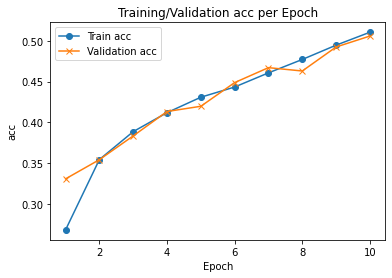

In [4]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

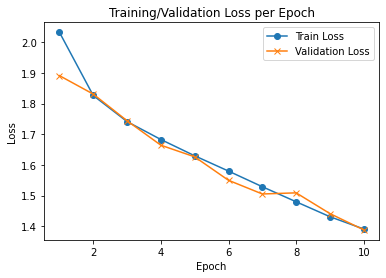

In [5]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')